# The Basics of algorithms

In [13]:
from IPython.display import HTML
import sys

A language has 3 parts:

- expressions and statements: how to structure simple computations
- means of combination: how to structure complex computations
- means of abstraction: how to build complex units

## Means of combination: the evaluation of functions

In [14]:
#nested call expressions
max(min(1,2), min(100,-3))

1

To evaluate any expression:

1. evaluate the operator and operand subexpressions
2. Apply the function that is the value of the operator subexpression to the arguments that are the values of the operand subexpressions.

The first rule means that we must first evaluate other sub-expressions. Thus the evaluation procedure is recursive in nature.

We'all have much more about the complex evaluation of the combinations of functions later...


## Evaluating a process

Notice that a function is a pattern for the local progress of some process. Given a set of functions making up a process, we'd like to be able to characterize the overall behaviour of a process. This is a difficult analysis to do in general.

But its important, as it tells us the performance of our code: which functions ought we speed up, and which we do not need to bother with. To build ourselves up for this, we should learn how to analyse how a function behaves in its usage of computational resources, both space and time.

### Recursive functions

We start with trying to understand recursive functions.

Lets look at the factorial function

In [15]:
def factorial_recursive(n):#notice NO local variables
    if n==1:
        return 1
    return n*factorial_recursive(n-1)

In [16]:
factorial_recursive(3)

6

from SICP:
>Recursive functions can rely more heavily on the interpreter itself, by storing the state of the computation as part of the expression tree and environment, rather than explicitly using names in the local frame. For this reason, recursive functions are often easier to define, because we do not need to try to determine the local state that must be maintained across iterations. On the other hand, learning to recognize the computational processes evolved by recursive functions can require some practice.

In [30]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+factorial_recursive(n%29%3A%0A++++if+n%3D%3D1%3A%0A++++++++return+1%0A++++return+n*factorial_recursive(n-1%29%0A%09++++%0Aa+%3D+factorial_recursive(3%29%0Aprint(a%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

#### Factorial, iteratively

...or when, one thing follows another...In this case we explicitly use state in the local frame.

In [31]:
def factorial_iterative(n):
        total, k = 1, 1
        while k <= n:
            total = total * k
            k = k + 1
        return total

In [32]:
factorial_iterative(3)

6

In [33]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+factorial_iterative(n%29%3A%0A++++++++total,+k+%3D+1,+1%0A++++++++while+k+%3C%3D+n%3A%0A++++++++++++total,+k+%3D+total+*+k,+k+%2B+1%0A++++++++return+total%0A++++++++%0Afactorial_iterative(3%29&origin=opt-frontend.js&cumulative=true&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

#### The Call Stack, time, and space

In the recursive call, you create a new frame for each function call. Thus, while you dont keep track of local state, you must expend resources to maintain an entire frame stack.

The stack answers the question: how does a computer pick up where it left off before a function call. There is a frame for each function call as we have seen, and storage for local variables. Calling a function pushes on a frame at the top of the **call stack**, while returning from a function deletes the frame. 
Wikipedia has a fairly good article on this:

https://en.wikipedia.org/wiki/Call_stack

If we try and add more than `sys.getrecursionlimit()` calls on the stack, we'll get a "Stack Overflow" as a "RuntimeError"

In [17]:
sys.getrecursionlimit()

1000

In [34]:
def something_recursive(n):#notice NO local variables
    if n==1:
        return 1
    return n + something_recursive(n-1)
something_recursive(900)

405450

In [35]:
something_recursive(1000)

RecursionError: maximum recursion depth exceeded in comparison

This notion of how environment frames are kept track of is not entirely true in languages like scheme and python, however, we'll use it as a part of our RAM model of computation since it will help us to reason easily about the space used up by a computation. (The details have to do with how python treats frames popped from the stack..what would you do if you were implementing closures?)

In [36]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+make_withdraw(balance%29%3A%0A++++%22%22%22Return+a+withdraw+function+that+draws+down+balance+with+each+call.%22%22%22%0A++++def+withdraw(amount%29%3A%0A++++++++nonlocal+balance%0A++++++++if+amount+%3E+balance%3A%0A++++++++++++return+%22Insufficient+funds%22%0A++++++++balance+%3D+balance+-+amount+++++++%23+Re-bind+the+existing+balance+name%0A++++++++return+balance%0A++++return+withdraw%0A++++%0Afrom20_correct+%3D+make_withdraw(20%29%0Aprint(from20_correct(5%29%29%0Aprint(from20_correct(5%29%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

### The Model of the computer and O(n)

We ought to formalize the compute and space needs of an algorithm. Consider the iterative factorial finder (1 or 2). There is a loop over n numbers. Informally, if multiplication is an O(1) operation: ie each multiplication takes constant time, you have to do n of these, so then finding the factorial is an O(n) operation.

The $O(n)$ notation means: if an algorithm is $O(f(n))$ in time, its running time is proportional to **at most** $f(n)$. Thus it is an **upper-bound** we are talking about here. 

But we must make a model to agree on the complexity of our basic operations. 

The model we will use is whats known as the RAM model. We abstract the details of the machine away, and assume a single process not interrupted by context switching or similar

- each simple operation (+, -, \*, =, if, func call) are charged 1
- loops are considered to be O(iterations) where iterations may depend on n
- each memory access takes O(1), with infinite memory, and no worry about disk.

We'll worry about things like cache or disk later...


Here is a table of the most important cases, from the Practice of Programming:

![](oofn.png)



Formally(from skiena):

>$f(n) = O(g(n))$ means c•g(n) is an upper bound on f(n). Thus there exists some constant c such that f(n) is always  $< c•g(n)$, for all $n > n_0$.

>f(n) = $\Omega(g(n))$ means c•g(n) is a lower bound on f(n). Thus there exists some constant c such that f(n) is always $>c•g(n)$, for all $n > n_0$.

>f(n) = $\Theta(g(n))$ means $c_{1}•g(n)$ is an upper bound on f(n) and $c_{2}•g(n)$ is a lower bound on f(n), for all $n>n_0$. Thus there exist constants $c_1$ and $c_2$ such that $f(n)<c_{1}•g(n)$ and $f(n)>c_{2}•g(n)$. This means that g(n) provides a nice, tight bound on f(n).

![](compnot.png)

### Recurrences for the Time Complexity

In general, we can formalize this process in a recursive function by a recurrence relationship:

Say the base case takes time a,

and then assume $T(n) = T(n-1) +b(n)$

Then unroll this and we see that the complexity, defined by the **asymptotic time for the algorithm to complete, as $n \rightarrow \infty$, is :

$$b(n) + b(n-1) + b(n-2) +.....+ b(1) + a$$

Above the answer is complex, but if all the b's were equal to a constant, call it b then we'd have:

$$T(n) = b \times n + a$$ and thus say that the algorithm is of order $O(n$).

#### Factorial

So if multiplication costs b and the return 1 costs a, then in both the iterative and recursive versions, $n!$ takes a cost of $b*n + a$ and thus is O(n)

### Space Complexity

Space Complexity is asking how much memory you will need.

What about the space complexity? The iterative algorithms dont create n frames on the stack, and are thus O(1) space complexity, while the recursive ones take n stacks, and are thus O(n) space complexity. 

### Sequential Search: Best Case, Worst Case, and Average case

![](bestworstaverage.png)

(from skiena)

Consider sequential search through an array or list (there is a difference between the two we will come to later). Currently consider a python list, and the attempt to find a value is done in python by going one by one through the list.


In [27]:
mylist = [1,5,2,7,9,3,6,9,9]
mylist.index(9)

4

The best case scenario is that the item you are searching for is the first thing in the list. Then, search is O(1). The worst case scenario is that it is at the end of the list. Then we are talking about O(n). On average, since there is no reason to suspect any ordering, the probability that the item is found at any index is equal. Then:

$$E(t) = \sum_i p_i t_i = \frac{1}{n}\sum_i i = \frac{n+1}{2}$$

This is order O(n).

Clearly the worse case and average behavior are the ones to know.

What about space complexity? If you were already given the array, then u dont have to set up any intermediate data structures, so its O(1). This is the assumption you should make when you quote the complexity.

On the other hand if you must load from file to memory, you will use up O(n) of memory. In the real world, when you are writing the whole program, you should know that your memory usage will rise linearly with the size of your dataset.

In [23]:
import random, time
trys=20
inputs = [10, 100, 1000, 10000, 100000, 1000000]
outputs = []
for n in inputs:
    listwithints=list(range(n))
    aver = 0.
    for tryit in range(trys):
        int_to_search = random.randrange(n)
        start = time.time()
        listwithints.index(int_to_search)
        elapsed = time.time() - start
        aver = aver + elapsed
    outputs.append(float(aver)/trys)



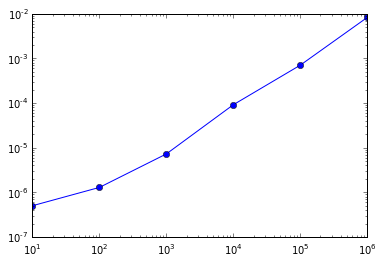

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(inputs, outputs, 'o-')
plt.xscale('log')
plt.yscale('log')

### Aside on time complexity: O(n) for long words


But is multiplication that cheap? Representing a number n takes lg(n) bits, and thus multiplying it by itself (roughly) is a lg(n)^2 operation. (there are faster methods, see https://en.wikipedia.org/wiki/Karatsuba_algorithm)

Thus the complexity of finding a factorial, when all is added up, in compute time, is:

$$\sum_i lg(i)^2$$

This is bounded by the highest term and so is $O(lg(n)^2)$.

### Aside on space complexity: Tail Recursion

Some languages support tail recursion elimination (scheme). Python does not. The following code still creates multiple frames on the stack. But notice the structure of the code: the multiplication in `factorial_recursive` has been replced by a (recursive) function call at the end. As a result, we could get rid of the current frame (or reuse it) if we wanted: the recursive call has all the information needed to compute the factorial. Whenever the "same" function call is done on the last step, the process is tail-recursive.

In [44]:
def fact_tailrec(total, n):
    if n ==1:
        return total
    return fact_tailrec(n*total, n-1)
def fact3(n):
    return fact_tailrec(1, n)
fact3(3)

6

Python does not do this. Why? See Guido himself: http://neopythonic.blogspot.pt/2009/04/tail-recursion-elimination.html

### Selection Sort

(see animation at http://www.cs.armstrong.edu/liang/animation/web/SelectionSort.html)

Basic Idea: swap the current element with the smallest in the remaining part of the array to the right..

In [37]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [38]:
A=[5,2,1,3,8,6,9]
selection_sort(A)
print(A)

<<< [5, 2, 1, 3, 8, 6, 9]
>>> [1, 2, 5, 3, 8, 6, 9]
<<< [1, 2, 5, 3, 8, 6, 9]
>>> [1, 2, 5, 3, 8, 6, 9]
<<< [1, 2, 5, 3, 8, 6, 9]
>>> [1, 2, 3, 5, 8, 6, 9]
<<< [1, 2, 3, 5, 8, 6, 9]
>>> [1, 2, 3, 5, 8, 6, 9]
<<< [1, 2, 3, 5, 8, 6, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
<<< [1, 2, 3, 5, 6, 8, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
<<< [1, 2, 3, 5, 6, 8, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
[1, 2, 3, 5, 6, 8, 9]


The outer loop goes around $n$ times, the inner $n-i-1$ times. Thus the running time for an input of size n is:

$$T(n) = \sum_{i=0}^{n-1} n -i -1 $$

$$ T(n) = n(n-1) - \frac{n(n-1)}2 - (n-1) \sim O(n^2)$$

Note that as we must still test all elements in the inner loop, the worst case, average, and best case complexities are all the same.

The space complexity again depends on whether you were given the array or not: if so, it is O(1).

Another way to think about this is in terms of the more formal definitions we made earlier.

We have n terms in the summation for the total time, each of which is bounded by n-1. So $T(n) < n(n-1) = O(n^{2})$

We have n/2 terms each which are bigger than n/2. So we have $T(n) > (n/2)^2 = \Omega(n^2)$

Together, $T(n) = \Theta(n^{2}) $, which if you see the definition is better than just providing an upper bound. 

But often an upper bound, in a worst case scenario, ie worst case O, is what you want to make a decision for what algorithm to use.